<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [29]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [30]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [31]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [32]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


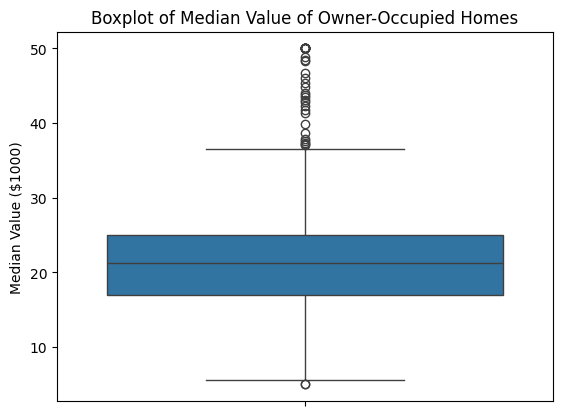

In [33]:
# Boxplot of MEDV
sns.boxplot(y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value ($1000)')
plt.show()


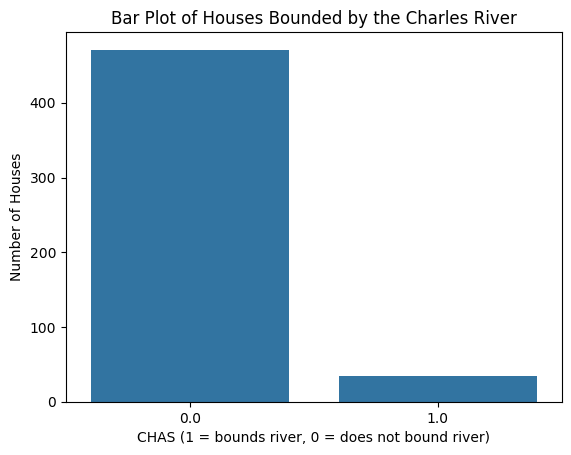

In [34]:
# Bar plot of CHAS variable
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot of Houses Bounded by the Charles River')
plt.xlabel('CHAS (1 = bounds river, 0 = does not bound river)')
plt.ylabel('Number of Houses')
plt.show()


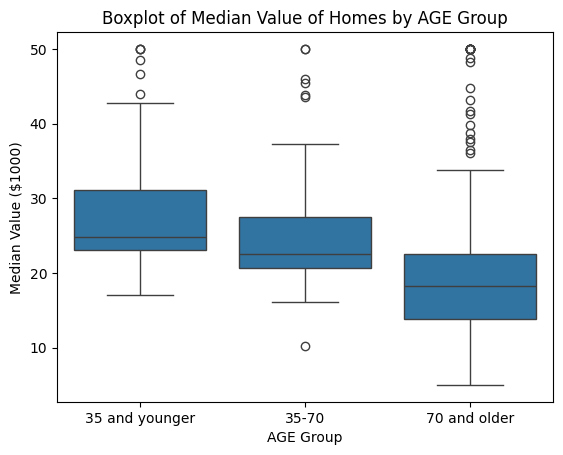

In [35]:
# Discretizing AGE into 3 groups and plotting
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 and younger', '35-70', '70 and older'])
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Homes by AGE Group')
plt.xlabel('AGE Group')
plt.ylabel('Median Value ($1000)')
plt.show()


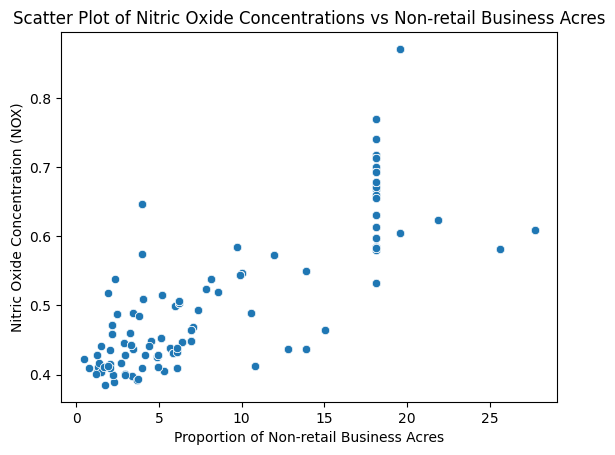

In [36]:
# Scatter plot of NOX and INDUS
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Non-retail Business Acres')
plt.xlabel('Proportion of Non-retail Business Acres')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.show()


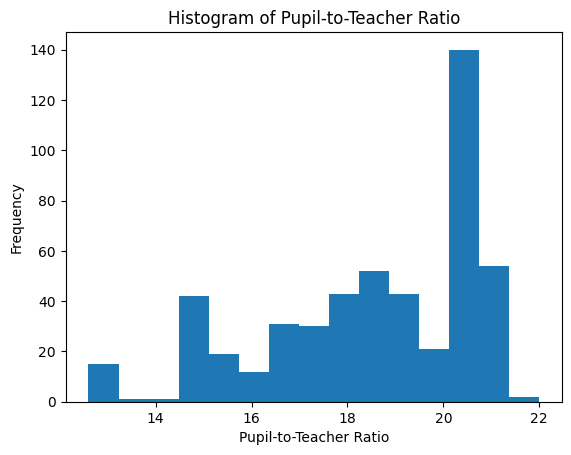

In [37]:
# Histogram for PTRATIO
plt.hist(boston_df['PTRATIO'], bins=15)
plt.title('Histogram of Pupil-to-Teacher Ratio')
plt.xlabel('Pupil-to-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


In [38]:
# T-test for CHAS and MEDV
chas_groups = boston_df.groupby('CHAS')['MEDV']
t_stat, p_val = scipy.stats.ttest_ind(chas_groups.get_group(1), chas_groups.get_group(0))
print(f"T-test statistic: {t_stat}, P-value: {p_val}")


T-test statistic: 3.996437466090509, P-value: 7.390623170519905e-05


In [39]:
# ANOVA for AGE and MEDV
model = ols('MEDV ~ AGE_Group', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                 sum_sq     df         F        PR(>F)
AGE_Group   5401.731883    2.0  36.40765  1.710501e-15
Residual   37314.563532  503.0       NaN           NaN


In [40]:
# Pearson correlation for NOX and INDUS
corr_coef, p_val = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson Correlation Coefficient: {corr_coef}, P-value: {p_val}")


Pearson Correlation Coefficient: 0.7636514469209192, P-value: 7.913361061210442e-98


In [41]:
# Regression analysis for DIS and MEDV
X = boston_df[['DIS']]
y = boston_df['MEDV']
X = sm.add_constant(X)  # Add constant for intercept
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        20:23:13   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0